## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Input the original .csv file 

In [2]:
tailratio = 0
file_name = input('Enter name of file: ')
if len(file_name) < 1 :
    file_name = 'logo_700_test.csv'
    tailratio = 5
    print('Main : Tail Ratio = 1 :', tailratio)
    print(file_name)
if file_name is "k" :
    file_name = 'silvano_kraken.csv'
    tailratio = 4.8
    print('Main : Tail Ratio = 1 :', tailratio)
    print(file_name)
else : 
    file_name = file_name
    if tailratio == 0 :
        tailratio = input('Please input main rotor to tail rotor ratio: ')
        print('Main : Tail Ratio = 1 :', tailratio)

Enter name of file: k
Main : Tail Ratio = 1 : 4.8
silvano_kraken.csv



### Read the .csv file with Pandas

In [3]:
csv_df = pd.read_csv(file_name, delimiter = ';')
print(csv_df.columns)
print(file_name)
# csv_df

Index(['Date', 'I(A)', 'U(V)', '(Q)mAh', 'Headspeed(rpm)', 'PWM(%)',
       'Temp(C)'],
      dtype='object')
silvano_kraken.csv


### Define Functions 

In [4]:
def max_sum_sbary(ary, n, k): 
    if (n < k): 
        print("Invalid") 
        return -1
    res = 0
    for i in range(k): 
        res += ary[i] 
    cur_sum = res 
    for i in range(k, n): 
        cur_sum += ary[i] - ary[i - k] 
        res = max(res, cur_sum) 
    return res 

### Declare Variables

In [5]:
date_x = csv_df['Date']
volts_y = csv_df['U(V)']
amps_y = csv_df['I(A)']
mah_y = csv_df['(Q)mAh']
headspeed_y = csv_df['Headspeed(rpm)']
tailspeed_y = headspeed_y * float(tailratio)
pwm_y = csv_df['PWM(%)']
tempc_y = csv_df['Temp(C)']
tempf_y = (((tempc_y / 5) * 9) + 32)
watts_y = volts_y * amps_y

max_amp = csv_df['I(A)'][csv_df['I(A)'].idxmax()]
min_volt = csv_df['U(V)'][csv_df['U(V)'].idxmin()]
max_tempc = csv_df['Temp(C)'][csv_df['Temp(C)'].idxmax()]
max_tempf = (((max_tempc / 5) * 9) + 32)
max_headspeed = csv_df['I(A)'][csv_df['I(A)'].idxmax()]
max_watt = max(watts_y)
max_hp = max_watt / 745.7
bat_dischargecap = csv_df['(Q)mAh'][csv_df['(Q)mAh'].idxmax()]

smplprd_len_lst = [10, 20, 30, 40, 50, 60] # for 10, 20, 30... second averaging calculations 

max_avg_amplst = list()
max_avg_wattlst = list()

for value in smplprd_len_lst: 
    avg_amp_value = max_sum_sbary(amps_y, len(csv_df), value) / value
    max_avg_amplst.append(avg_amp_value)

for value in smplprd_len_lst: 
    avg_watt_value = max_sum_sbary(watts_y, len(csv_df), value) / value
    max_avg_wattlst.append(avg_watt_value)

first_date = str(csv_df['Date'][0])
last_date = str(csv_df['Date'][len(csv_df) - 1])
# print('first date', first_date)
# print('last date', last_date)

start_mnt = int(first_date[14:16])
# print('start minute:', start_mnt)
start_scd = int(first_date[17:19])
# print('start second:', start_scd)
stop_mnt = int(last_date[14:16])
# print('stop minute:', stop_mnt)
stop_scd = int(last_date[17:19])
# print('stop second:', stop_scd)

seconds = stop_scd + (60 - start_scd)
# print(seconds)

remainder_mnt = 0
if seconds > 60 :
    seconds = seconds - 60
    remainder_mnt = 1
#     print('Remainder logic executed!')
    
if stop_mnt < start_mnt :
    stop_mnt = stop_mnt + 60
#     print('Through hour logic exectued!')
    
minutes = ((stop_mnt - start_mnt) - 1) + remainder_mnt

### Flight Overview Analysis

In [6]:
print('Total CSV Log Length:', minutes, 'Minutes', seconds, 'Seconds')
print('Minimum Voltage:', min_volt, 'Volts')
print('Maximum Current:', max_amp, 'Amps')
print('Maximum Power:', max_watt, 'Watts', 'or', max_hp, 'Horse Power')
print('Maximum ESC Temperature:', max_tempf, 'Degrees Fahrenheit /', max_tempc, 'Degrees Celsius')
print('Battery Capacity Discharged:', bat_dischargecap, 'mAh')
print(file_name)

Total CSV Log Length: 4 Minutes 45 Seconds
Minimum Voltage: 39.4 Volts
Maximum Current: 180.9 Amps
Maximum Power: 7471.17 Watts or 10.01900227973716 Horse Power
Maximum ESC Temperature: 150.8 Degrees Fahrenheit / 66 Degrees Celsius
Battery Capacity Discharged: 2899.0 mAh
silvano_kraken.csv


### Plot Highest Average Amps and Watts

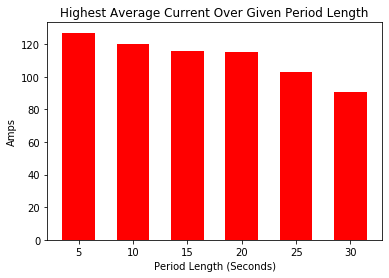

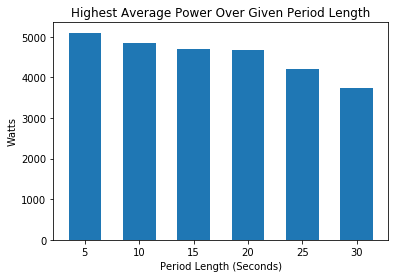

silvano_kraken.csv


In [7]:
plt.rcParams['figure.figsize'] = (6, 4)

sec_prds_x = [5, 10, 15, 20, 25, 30]

plt.bar(sec_prds_x, max_avg_amplst, width = 3, color ='r')
plt.title('Highest Average Current Over Given Period Length')
plt.xlabel('Period Length (Seconds)')
plt.ylabel('Amps')

plt.show()

plt.bar(sec_prds_x, max_avg_wattlst, width = 3)
plt.title('Highest Average Power Over Given Period Length')
plt.xlabel('Period Length (Seconds)')
plt.ylabel('Watts')

plt.show()
print(file_name)

### Plot Voltage

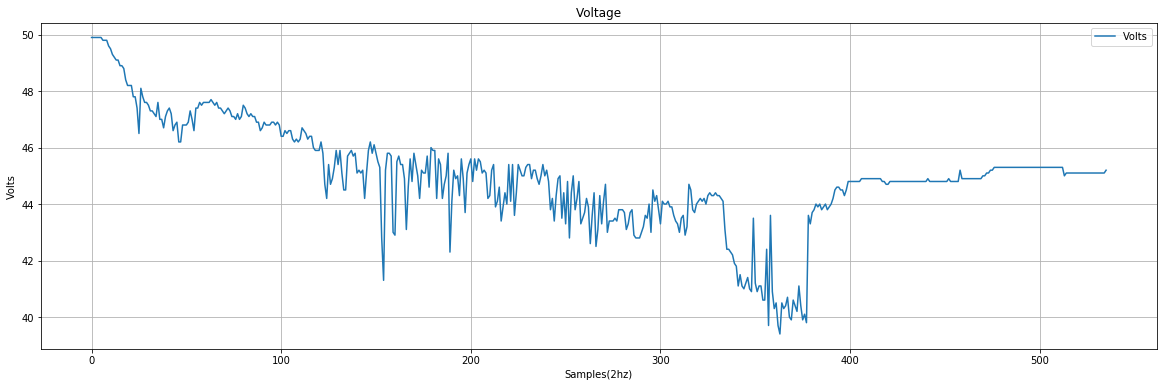

silvano_kraken.csv


In [8]:
plt.rcParams['figure.figsize'] = (20, 6)

plt.plot(volts_y, label = 'Volts')

plt.title('Voltage')
plt.xlabel('Samples(2hz)')
plt.ylabel('Volts')
plt.legend()
plt.grid()

plt.show()
print(file_name)

### Plot Amps

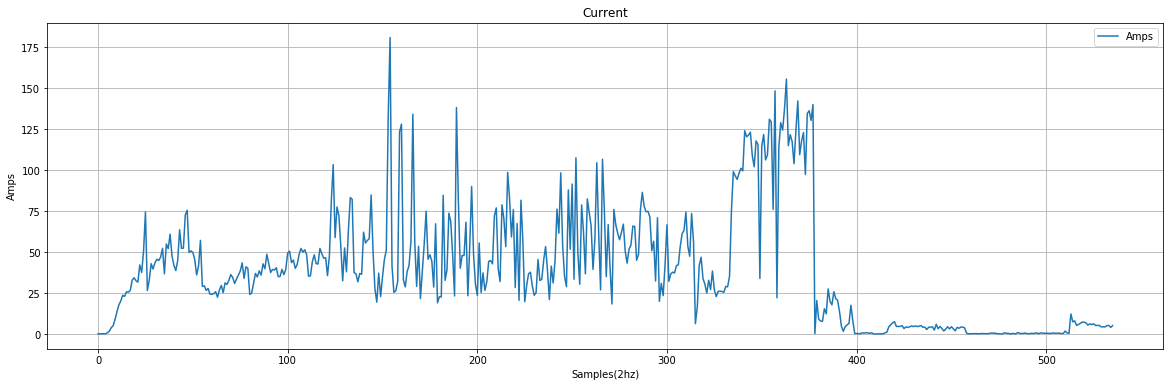

silvano_kraken.csv


In [9]:
plt.rcParams['figure.figsize'] = (20, 6)

plt.plot(amps_y, label = 'Amps')

plt.title('Current')
plt.xlabel('Samples(2hz)')
plt.ylabel('Amps')
plt.legend()
plt.grid()

plt.show()
print(file_name)

### Plot mAh

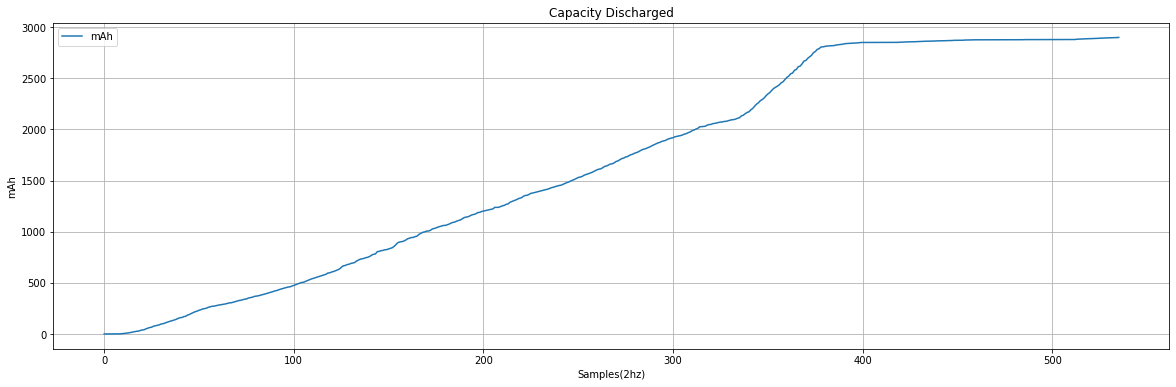

silvano_kraken.csv


In [10]:
plt.rcParams['figure.figsize'] = (20, 6)

plt.plot(mah_y, label = 'mAh')

plt.title('Capacity Discharged')
plt.xlabel('Samples(2hz)')
plt.ylabel('mAh')
plt.legend()
plt.grid()

plt.show()
print(file_name)

### Plot PWM

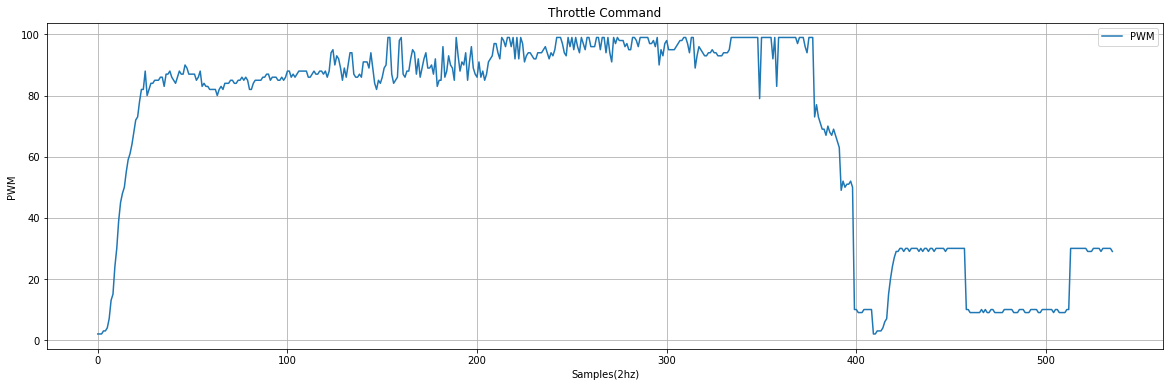

silvano_kraken.csv


In [11]:
plt.rcParams['figure.figsize'] = (20, 6)

plt.plot(pwm_y, label = 'PWM')

plt.title('Throttle Command')
plt.xlabel('Samples(2hz)')
plt.ylabel('PWM')
plt.legend()
plt.grid()

plt.show()
print(file_name)

### Plot Headspeed and Tailspeed

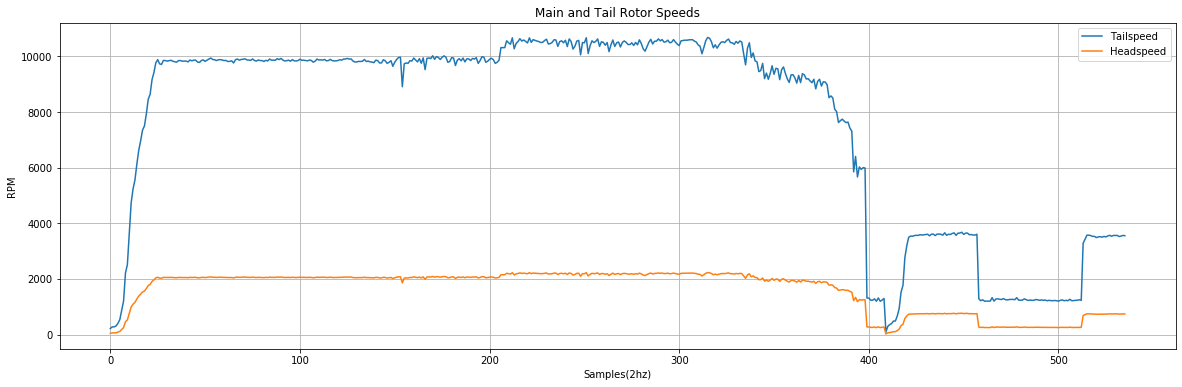

silvano_kraken.csv


In [12]:
plt.rcParams['figure.figsize'] = (20, 6)

plt.plot(tailspeed_y, label = 'Tailspeed')
plt.plot(headspeed_y, label = 'Headspeed')

plt.title('Main and Tail Rotor Speeds')
plt.xlabel('Samples(2hz)')
plt.ylabel('RPM')
plt.legend()
plt.grid()

plt.show()
print(file_name)

### Plot Volts, Amps, Watts, and ESC Temperature

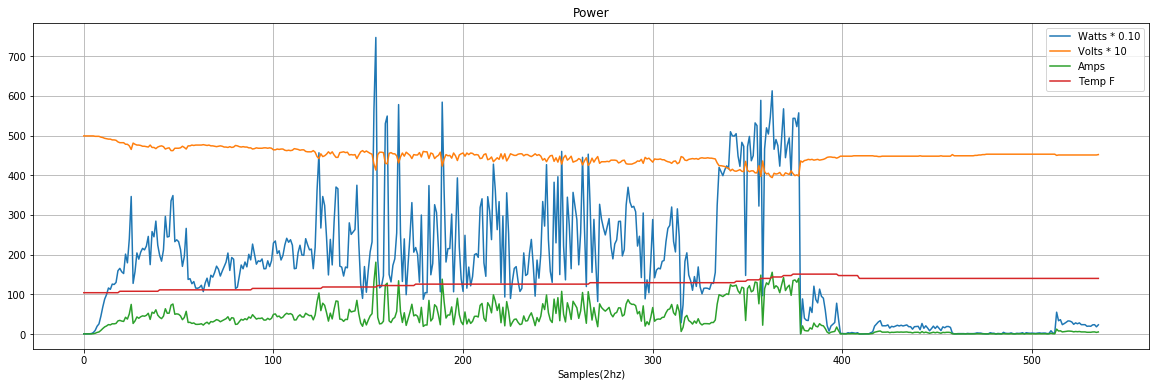

silvano_kraken.csv


In [13]:
plt.rcParams['figure.figsize'] = (20, 6)

plt.plot((watts_y) * 0.10, label = 'Watts * 0.10')
plt.plot(volts_y * 10, label = 'Volts * 10')
plt.plot(amps_y, label = 'Amps')
plt.plot(tempf_y, label = 'Temp F')

plt.title('Power')
plt.xlabel('Samples(2hz)')
plt.legend()
plt.grid()

plt.show()
print(file_name)

### Assorted Plots

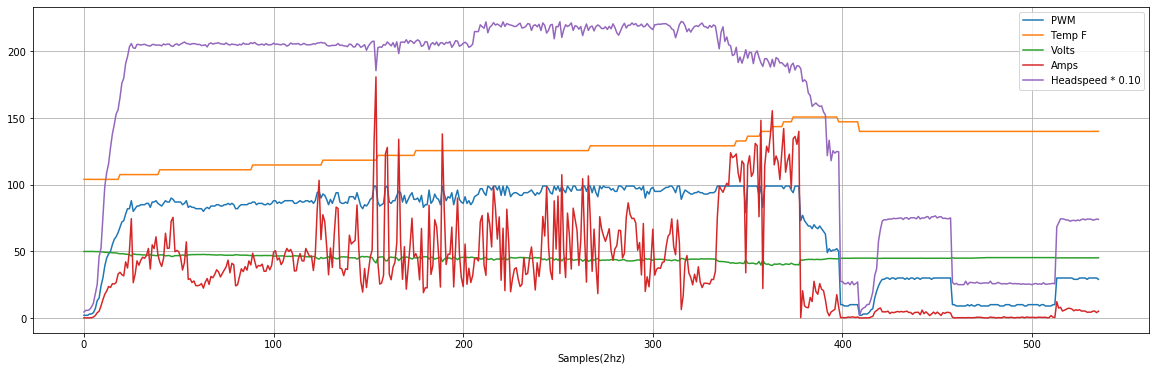

silvano_kraken.csv


In [14]:
plt.rcParams['figure.figsize'] = (20, 6)

plt.plot(pwm_y, label = 'PWM')
plt.plot(tempf_y, label = 'Temp F')
plt.plot(volts_y, label = 'Volts')
plt.plot(amps_y, label = 'Amps')
plt.plot(headspeed_y * 0.1, label = 'Headspeed * 0.10')

plt.title('')
plt.xlabel('Samples(2hz)')
plt.ylabel('')
plt.legend()
plt.grid()

plt.show()
print(file_name)

### Declare and Manually Input Analysis Periods 1 and 2... 

In [15]:
# prd_1_stt = int(input('Input start point of analysis period 1: '))
# prd_1_stp = int(input('Input end point of analysis period 1: '))
# prd_2_stt = int(input('Input start point of analysis period 2: '))
# prd_2_stp = int(input('Input end point of analysis period 2: '))
# prd_1_tme = (prd_1_stp-prd_1_stt) / 2
# prd_2_tme = (prd_2_stp-prd_2_stt) / 2

### Or if you're lazy...

In [16]:
prd_1_stt = 100
prd_1_stp = 200
prd_2_stt = 300
prd_2_stp = 400
prd_1_tme = (prd_1_stp-prd_1_stt) / 2
prd_2_tme = (prd_2_stp-prd_2_stt) / 2

### Plot Analysis Periods 1 and 2 

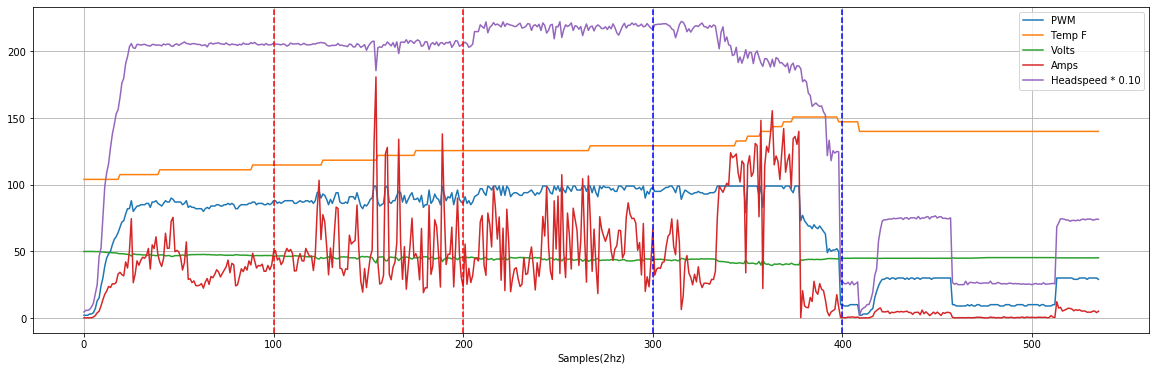

silvano_kraken.csv


In [17]:
plt.rcParams['figure.figsize'] = (20, 6)

plt.plot(pwm_y, label = 'PWM')
plt.plot(tempf_y, label = 'Temp F')
plt.plot(volts_y, label = 'Volts')
plt.plot(amps_y, label = 'Amps')
plt.plot(headspeed_y * 0.1, label = 'Headspeed * 0.10')

plt.title('')
plt.xlabel('Samples(2hz)')
plt.ylabel('')
plt.legend()
plt.grid()

ax = plt.gca()
ax.axvline(prd_1_stt, color = 'r', linestyle = '--', label = 'Sample Period 1')
ax.axvline(prd_1_stp, color = 'r', linestyle = '--')
ax.axvline(prd_2_stt, color = 'b', linestyle = '--', label = 'Sample Period 2')
ax.axvline(prd_2_stp, color = 'b', linestyle = '--')

plt.show()
print(file_name)

### Analysis Periods 1 and 2

In [18]:
print('Period 1: Sample', prd_1_stt, 'through', prd_1_stp, '(', prd_1_tme, 'seconds)'  )
print('')
print('Average Current =', np.mean(amps_y[prd_1_stt : prd_1_stp]), 'Amps')
print('Current Standard Deviation =', np.std(amps_y[prd_1_stt : prd_1_stp]), 'amps')
print('Average Watts =', np.mean(watts_y[prd_1_stt : prd_1_stp]), 'Watts')
print('Watts Standard Deviation =', np.std(watts_y[prd_1_stt : prd_1_stp]), 'watts')
print('Average Headspeed =', np.mean(headspeed_y[prd_1_stt : prd_1_stp]), 'RPM')
print('Average Tailspeed =', np.mean(tailspeed_y[prd_1_stt : prd_1_stp]), 'RPM')
print('Headspeed Standard Deviation =', np.std(headspeed_y[prd_1_stt : prd_1_stp]), 'RPM')
print('Tailspeed Standard Deviation =', np.std(tailspeed_y[prd_1_stt : prd_1_stp]), 'RPM')
print('')
print('Period 2: Sample', prd_2_stt, 'through', prd_2_stp, '(',prd_2_tme, 'seconds )'  )
print('')
print('Average Current =', np.mean(amps_y[prd_2_stt : prd_2_stp]), 'Amps')
print('Current Standard Deviation =', np.std(amps_y[prd_2_stt : prd_2_stp]), 'amps')
print('Average Watts =', np.mean(watts_y[prd_2_stt : prd_2_stp]), 'Watts')
print('Watts Standard Deviation =', np.std(watts_y[prd_2_stt : prd_2_stp]), 'Watts')
print('Average Headspeed =', np.mean(headspeed_y[prd_2_stt : prd_2_stp]), 'RPM')
print('Average Taildspeed =', np.mean(tailspeed_y[prd_2_stt : prd_2_stp]), 'RPM')
print('Headspeed Standard Deviation =', np.std(headspeed_y[prd_2_stt : prd_2_stp]), 'RPM')
print('Tailspeed Standard Deviation =', np.std(tailspeed_y[prd_2_stt : prd_2_stp]), 'RPM')
print(file_name)

Period 1: Sample 100 through 200 ( 50.0 seconds)

Average Current = 53.19800000000001 Amps
Current Standard Deviation = 28.010330165851308 amps
Average Watts = 2386.8926999999994 Watts
Watts Standard Deviation = 1173.661793175406 watts
Average Headspeed = 2051.95 RPM
Average Tailspeed = 9849.36 RPM
Headspeed Standard Deviation = 25.580998807708813 RPM
Tailspeed Standard Deviation = 122.78879427700244 RPM

Period 2: Sample 300 through 400 ( 50.0 seconds )

Average Current = 65.523 Amps
Current Standard Deviation = 47.163241735487176 amps
Average Watts = 2722.115700000001 Watts
Watts Standard Deviation = 1883.9301314906857 Watts
Average Headspeed = 1928.32 RPM
Average Taildspeed = 9255.936 RPM
Headspeed Standard Deviation = 312.5206834755101 RPM
Tailspeed Standard Deviation = 1500.0992806824488 RPM
silvano_kraken.csv
